<a href="https://colab.research.google.com/github/dyjdlopez/icpep-ai-workshop-2021/blob/main/day2/ICpEP_AI_D2_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Fundamentals of Machine Learning
Copyright D.Lopez 2021 | All Rights reserved <br><br>
The main difference between machine learning and traditional programming is the paradigm at which a solution is created.<br>
<b>Traditional Programming</b><br>
In traditional programming or the usual way, when we code a solution we start with a set of given inputs and some set of rules we code so that when we run our program with the set of inputs we get some desirable output.<br>
<b>Machine Learning</b><br>
In machine learning programming, we have a set of inputs and outputs and we try to find a way to determine a rule, pattern, or equation that will describe the relationship between the inputs and outputs.

![image](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2034058%2F27e3bdf0545d237a1672fc201481774d%2Fml.png?generation=1562172278272384&alt=media)<br>

In this module, we will have a start with machine learning. We’ll learn about datasets and the learning algorithms that we can use to recognize patterns between datasets.



## Part 1: Datasets
Datasets consist of data that are relevant to a certain scenario or subject of interest. It may contain numerical, text, image data, or a mix of them. Datasets, depending on where they are obtained, need to be cleaned and transformed to fit your needs.

### 1.1 Pandas

Another tool to add to the machine learning engineer's toolbox is Pandas. [Pandas](https://pandas.pydata.org/docs/#module-pandas) is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. <br>
Check out:
* [Setting up DataFrames in Pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html#min-tut-01-tableoriented)
* [Reading and writing Data](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html#min-tut-02-read-write)
* [Summarizing Stastics of a Dataset](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html#min-tut-06-stats)

In [1]:
# !pip install pandas
import pandas as pd
import numpy as np

In [10]:
# We'll use a preset dataset available in Google Colab
ds = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [11]:
ds.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [12]:
ds.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 1.2 Visualizing a dataset

In [13]:
import matplotlib.pyplot as plt

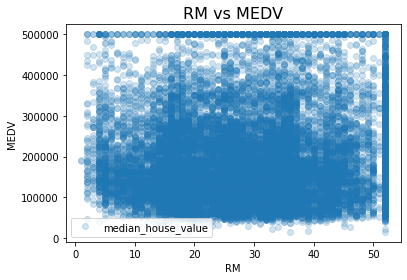

In [27]:
ds.plot(x='housing_median_age', y='median_house_value', style='o', alpha=0.2)  
plt.title('RM vs MEDV', fontsize=16)  
plt.xlabel('RM')  
plt.ylabel('MEDV')  
plt.show()

Another visualization libary is [Seaborn](https://seaborn.pydata.org/). Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. If you're interested you can check out the Seaborn [tutorials](https://seaborn.pydata.org/tutorial.html).

In [28]:
# !pip install seaborn
import seaborn as sns

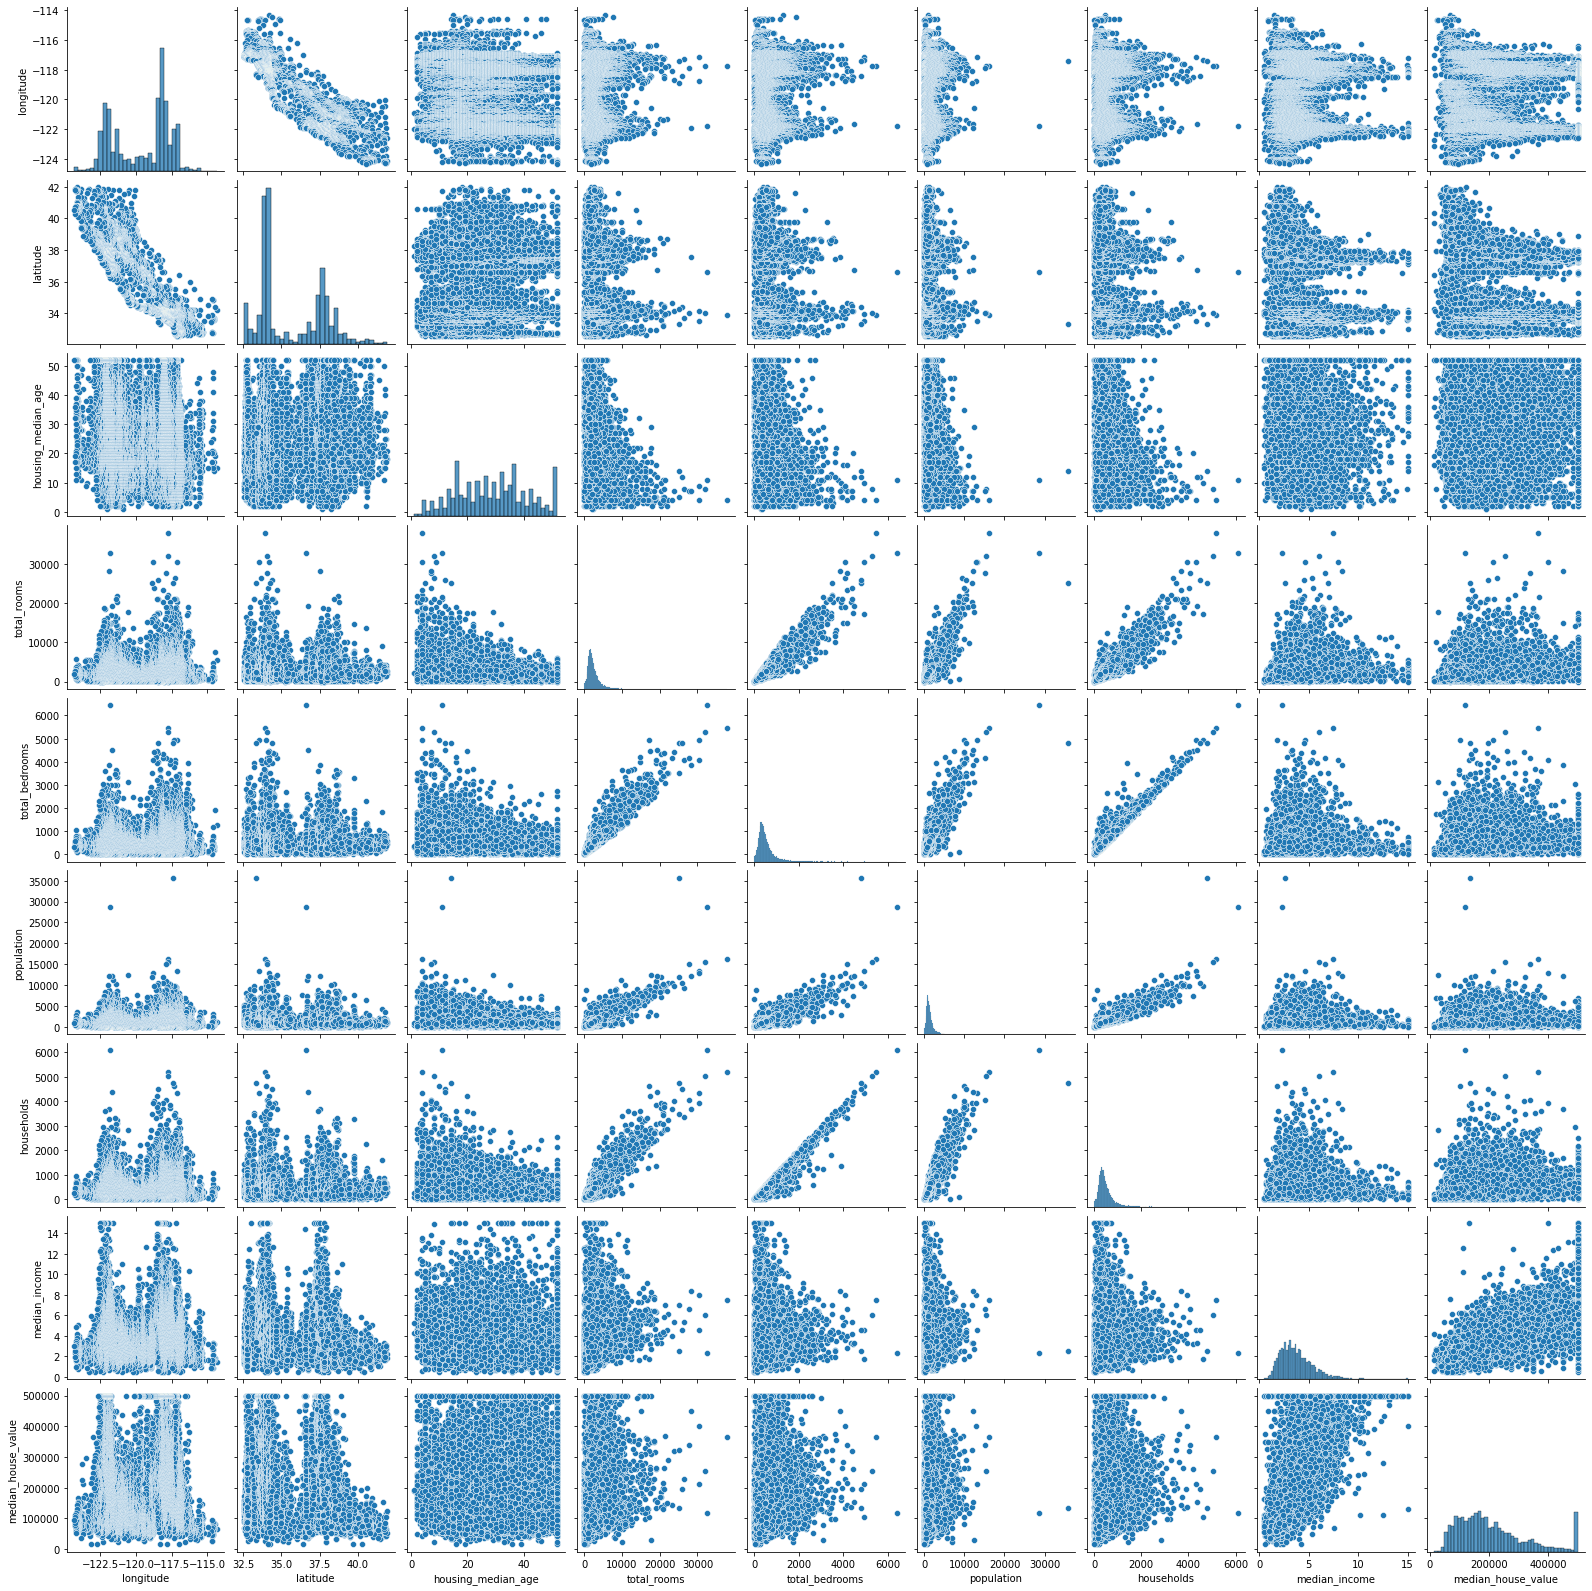

In [29]:
sns.pairplot(ds)

In [123]:
X = ds['population'].values.reshape(-1,1)
y = ds['total_bedrooms'].values.reshape(-1,1)

## Part 2: Curve Fitting
A fundamental concept in Pattern recognition is curve fitting. This allows our programs to do approximations and optimizations given a set of data. For this section, we will use [SciKit Learn](https://scikit-learn.org/stable/index.html). SciKit Learn is one of the most useful libraries for Data Science and Machine Learning Engineering in modeling learning algorithms. It has a range of APIs that will greatly assist in Data wrangling, data validation, supervised learning, and unsupervised learning. Check out these SciKit learn [tutorials](https://scikit-learn.org/stable/user_guide.html) for better understanding.

In [124]:
#!pip install scikit-learn
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 2.1 Linear Regression
Linear regression is one of the fundamental and easiest curve fitting techniques in Pattern Recognition. Long story short, linear regression finds the best-fit first order polynomial to a given dataset $X$. This line is represented as:
$$y = \omega X+b$$
A linear regression algorithm or a linear regressor $y$ learns the weights $\omega$ and bias $b$.

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [126]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
model_summary = pd.DataFrame(['population'], columns=['Features'])
model_summary['Weights Raw'] = model.coef_
model_summary = model_summary.append({'Features':'Intercept', 'Weights Raw':float(model.intercept_)}, ignore_index=True)
model_summary

,Features,Weights Raw
0,population,0.321163
1,Intercept,80.366185


From here we can interpret this as the regressor as:
$$y_{\text{total bedrooms}} = \omega_{\text{population}}X+b \\
y_{\text{total bedrooms}} = 0.321\cdot X + 80.366$$

In [128]:
preds = model.predict(X_test)
out = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': preds.flatten()})
out

,Actual,Predicted
0,678.0,922.133136
1,347.0,415.338688
2,199.0,279.165782
3,269.0,283.983219
4,1052.0,1063.123480
...,...,...
3395,451.0,504.300704
3396,722.0,524.533943
3397,253.0,309.355058
3398,3298.0,2494.544807


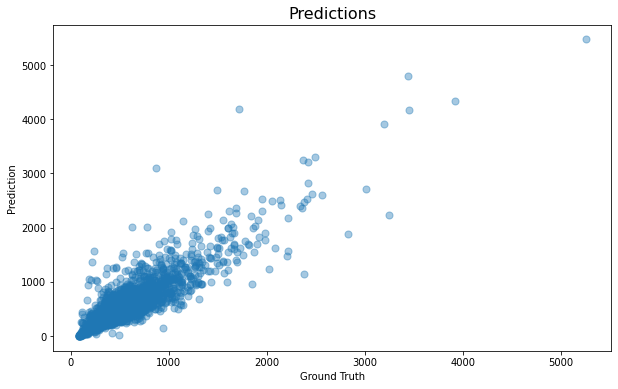

In [129]:
plt.figure(figsize=(10,6))
plt.title('Predictions', fontsize=16)

plt.scatter(preds, y_test, s = 50,  alpha=0.4)
plt.xlabel('Ground Truth', fontsize=10)
plt.ylabel('Prediction', fontsize=10)

plt.show()

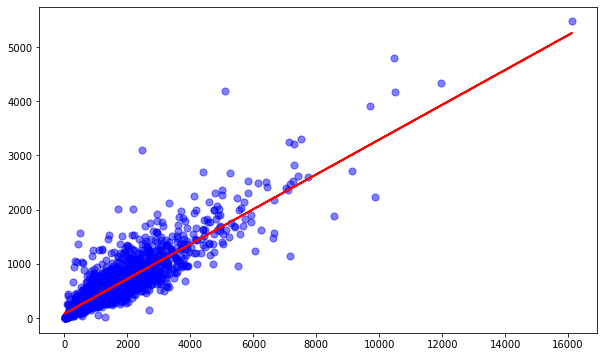

In [130]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test,  s = 50, color='blue', alpha=0.5)
plt.plot(X_test, preds, color='red', linewidth=2)
plt.show()

<b>Formula: Adjusted $R^2$</b><br>
$R^2_{adj.} = 1-(1-R^2)*\frac{n-1}{n-p-1}$

Whereas: p = Predictors; n = Observations

In [131]:
def adjr2(r2,x):
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [132]:
MSE = metrics.mean_squared_error(y_test, preds)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, preds)
AR2 = adjr2(R2,X_train)
model_metrics = pd.DataFrame([['MSE'],['RMSE'],['R^2'],
                              ['Adjusted R^2']], 
                             columns=['Metrics'])
model_metrics['Simple Regression'] = MSE, RMSE, R2, AR2
model_metrics

,Metrics,Simple Regression
0,MSE,35663.370295
1,RMSE,188.847479
2,R^2,0.785455
3,Adjusted R^2,0.785439


### 2.2 Multiple Linear Regression
Taking linear regressors to the new level, we’ll use Multiple Linear Regression. In a multiple linear regressor, we take $n$ number of parameters or features to describe a target $y$. We can represent this as:
$$y = \omega_1X + \omega_2X + ... +\omega_nX + b$$

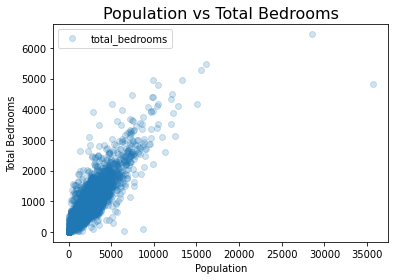

In [134]:
ds.plot(x='population', y='total_bedrooms', style='o', alpha=0.2)  
plt.title('Population vs Total Bedrooms', fontsize=16)  
plt.xlabel('Population')  
plt.ylabel('Total Bedrooms')  
plt.show()

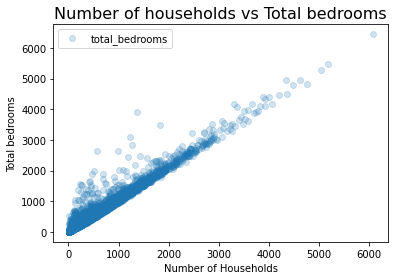

In [135]:
ds.plot(x='households', y='total_bedrooms', style='o', alpha=0.2)  
plt.title('Number of households vs Total bedrooms', fontsize=16)  
plt.xlabel('Number of Households')  
plt.ylabel('Total bedrooms')  
plt.show()

In [136]:
X = pd.DataFrame(np.c_[ds['population'], ds['households']], columns=['population','households'])
y = ds['total_bedrooms']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [137]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
model_summary = pd.DataFrame(X.columns, columns=['Features'])
model_summary['Weights Raw'] = model.coef_.reshape(2,1)
model_summary = model_summary.append({'Features':'Intercept', 'Weights Raw':float(model.intercept_)}, ignore_index=True)
model_summary

,Features,Weights Raw
0,population,-0.021927
1,households,1.134516
2,Intercept,1.916213


In [139]:
preds = model.predict(X_test)
out = pd.DataFrame({'Actual': y_test, 'Predicted': preds})
out

,Actual,Predicted
4752,678.0,694.360467
13348,347.0,377.261450
13459,199.0,250.416597
6691,269.0,284.123184
12750,1052.0,1137.406516
...,...,...
11403,451.0,491.446369
7081,722.0,665.915013
4919,253.0,277.852871
13090,3298.0,3537.882380


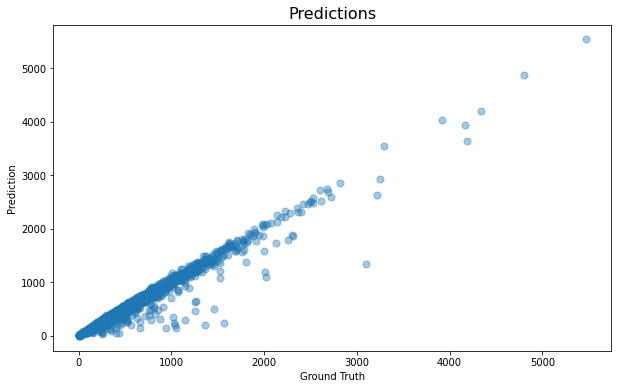

In [140]:
plt.figure(figsize=(10,6))
plt.title('Predictions', fontsize=16)

plt.scatter(y_test, preds, s = 50,  alpha=0.4)
plt.xlabel('Ground Truth')
plt.ylabel('Prediction', fontsize=10)

plt.show()

In [141]:
MSE = metrics.mean_squared_error(y_test, preds)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, preds)
AR2 = adjr2(R2,X_train)
model_metrics['Multiple Regression'] = MSE, RMSE, R2, AR2
model_metrics

,Metrics,Simple Regression,Multiple Regression
0,MSE,35663.370295,7289.798772
1,RMSE,188.847479,85.380318
2,R^2,0.785455,0.956146
3,Adjusted R^2,0.785439,0.956139


In [143]:
site1 = np.array([[5126, 1270]])
model.predict(site1)

array([1330.35341674])

## Part 3: Gradient Descent
Diving deeper into the Machine Learning rabbit hole, we need to discuss the fundamental technique in machine learning—Gradient Descent. Gradient descent is an optimization algorithm used to minimize functions by iteratively moving in the direction of the steepest descent as defined by the negative of the gradient. In machine learning, gradient descent is used to update the parameters of models. In this section, we'll try to apply this algorithm with the fundamental unit of a neural network—the Perceptron.

### 3.1 Perceptron Algorithm
The Perceptron was first conceptualized by Frank Rosenblatt in his paper [The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.335.3398&rep=rep1&type=pdf) in 1958. The perceptron is one of the earliest mathematical conceptualization of a brain neuron. In simplest terms, a perceptron does a weighted sum of all inputs and then performs an activation. In the early implementations of the perceptron the activation used was a step function described as:
$$step(z) = \left\{
  \begin{array}\\
    1 \text{ if } \ b+ \sum w_iX_n\geq 0 \\
    0 \text{ otherwise}
    \end{array}
\right.
$$
![image](https://jontysinai.github.io/assets/article_images/2017-11-11-the-perceptron/bio-vs-MCP.png)


First let's create a dummy dataset for binary classification.

In [702]:
N = 100
m1 = np.array([-2, 0]).T
m2 = np.array([2, 0]).T
S = np.identity(2)

In [703]:
np.random.seed(0)
X_train = np.array([np.random.multivariate_normal(m1,S,int(N/2)),np.random.multivariate_normal(m2,S,int(N-(N/2)))]).T
y_train = np.array([np.ones(int(N/2)), np.zeros(int(N-(N/2)))]).reshape((-1,1))
X_train = np.concatenate((X_train[0], X_train[1]), axis=0)

In [704]:
X_train[0:5]

array([[-0.23594765,  3.8831507 ],
       [-1.02126202,  0.729515  ],
       [-0.13244201,  0.82687659],
       [-1.04991158,  1.58638102],
       [-2.10321885,  3.92294203]])

In [705]:
X_train.shape

(100, 2)

In [706]:
y_train[0:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [707]:
y_train.shape

(100, 1)

In [708]:
np.random.seed(100)
M = N*0.4
X_test = np.array([np.random.multivariate_normal(m1,S,int(M/2)),np.random.multivariate_normal(m2,S,int(M-(M/2)))]).T
X_test = np.concatenate((X_test[0], X_test[1]), axis=0)
y_test = np.array([np.ones(int(M/2)), np.zeros(int(M-(M/2)))]).reshape((-1,1))

In [709]:
def visualize(X):
  plt.figure(figsize=(8,8))
  mid = int(X.shape[0]/2)
  plt.scatter(X[:mid,0], X[:mid,1], c='r', label='1')
  plt.scatter(X[mid:,0], X[mid:,1], c='b', label='0')

  plt.legend()
  plt.grid()
  plt.show()


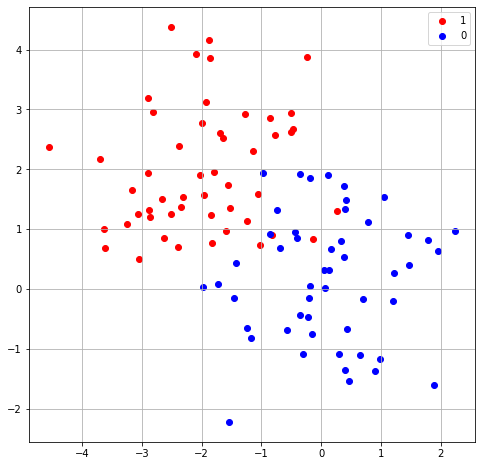

In [710]:
visualize(X_train)

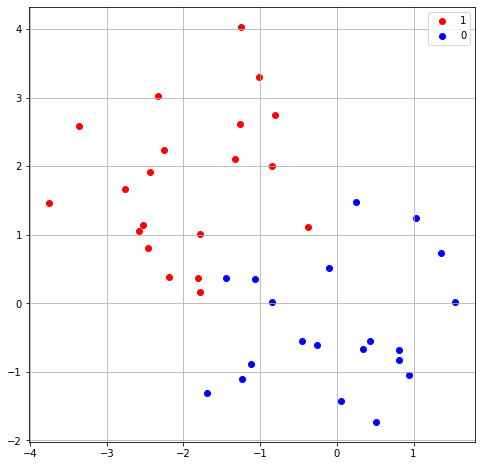

In [711]:
visualize(X_test)

In [767]:
def step_activation(z):
  """
  Compute the step activation of z

  Arguments:
  z -- A scalar or numpy array of any size.

  Return:
  filtered step activations step(z)
  """
  return np.where(z>=0, 1,0)

In [768]:
step_activation(-0.1)

array(0)

In [769]:
def init_weights(dim):
  """
  Does a zero-initialization of the weights and bias

  Arguments:
  dim -- Desired dimension for the weights.

  Return:
  w -- initialized weights
  b -- initilaized bias
  """
  w = np.zeros(shape=(dim,1))
  b = 0
  return w, b

In [770]:
def sum_err(preds,y):
  """
  Computes the Sum of Squared Errors for a set of predictions
  and truth values

  Arguments:
  preds -- Set of predictions.
  y -- Set of truth values

  Return:
  sse -- Sum of the squared errors
  """
  sse = np.sum(np.square(y-preds))
  return sse


In [771]:
def accuracy(preds, Y):
  """
  Computes the accuracy for a set of predictions
  and truth values

  Arguments:
  preds -- Set of predictions.
  y -- Set of truth values

  Return:
  accuracy -- Computed accuracy
  """
  accuracy = 1-np.mean(np.abs(preds-Y))
  return accuracy

In [772]:
def propagate(X,y,w,b):

  # Compute for the transformed vector of the 
  # dataset w.r.t the weights and biases
  z = (X@w) + b

  # Compute for the step activation
  A = step_activation(z)

  # Compute for the prediction error
  error = A-y
  acc = accuracy(y,A)

  # Update the weights and biases
  # Learning/Update routine
  w = np.dot(X.T,error)
  b = np.sum(error)

  # Compute the cost
  cost = sum_err(A,y)

  # Store the parameters in a dictionary for tracking
  grads = {"dw": w,
           "db": b}
  
  return grads, cost, acc

In [773]:
w,b = init_weights(X_train.shape[1])
propagate(X_train,y_train,w,b)

({'db': 50.0, 'dw': array([[5.14049338],
         [9.13737342]])}, 50.0, 0.5)

In [776]:
def train(w, b, X, y, lr, epochs, early_stopping=True, stop_thresh=0.9):
  costs = []
  accuracies = []

  for i in range(epochs):
    # Do a forward propagation to obtain the gradients
    grads, cost, accuracy = propagate(X,y,w,b)

    # Locally store the gradients    
    dw=grads['dw']
    db=grads['db']

    # Update routine per epoch
    w = w - lr*dw
    b = b - lr*db

    # Store the costs per epoch for logs      
    
    if i % 20 == 0:
      print (f"Epoch {i}: Loss: {cost} Accuracy: {accuracy}")
      costs.append(cost)
      accuracies.append(accuracy)

    # Store the learned parameters for logs
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    if early_stopping and accuracy >= stop_thresh:
      print(f"Target metric met, stopping the training at {i} epoch(s).\n")
      break

  return params, grads, costs


In [777]:
w,b = init_weights(X_train.shape[1])
learning_rate = 1
epochs = 100

params, grads, costs = train(w, b, X_train, y_train, 
                             lr=learning_rate, epochs=epochs, 
                             early_stopping=True, stop_thresh=1.0)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Epoch 0: Loss: 50.0 Accuracy: 0.5
Epoch 20: Loss: 8.0 Accuracy: 0.92
Epoch 40: Loss: 6.0 Accuracy: 0.94
Epoch 60: Loss: 11.0 Accuracy: 0.89
Epoch 80: Loss: 16.0 Accuracy: 0.84
w = [[-14.03301621]
 [ 14.90592208]]
b = -25.0
dw = [[ 1.96685423]
 [-2.95259353]]
db = -4.0


In [778]:
def predict(X, weights, bias):
  z = (X@weights)+bias
  return np.where(z>=0, 1,0)


In [779]:
weights = params["w"]
bias = params["b"]
preds = predict(X_test,weights,bias)
accuracy(y_test, preds)

0.95

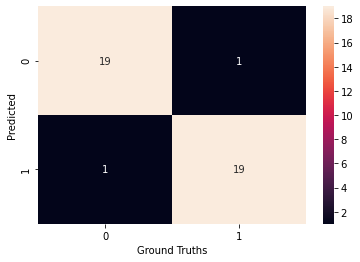

In [780]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, preds)
sns.heatmap(c_matrix, annot=True)
plt.xlabel("Ground Truths")
plt.ylabel("Predicted")
plt.show()

In [781]:
from sklearn.metrics import f1_score, recall_score, precision_score
print(f"F1 Score: \t{f1_score(y_test, preds)}")
print(f"Recall: \t{recall_score(y_test, preds)}")
print(f"Precision: \t{precision_score(y_test, preds)}")

F1 Score: 	0.9500000000000001
Recall: 	0.95
Precision: 	0.95


In [784]:
def plot_weights(X,w,b):
  plt.figure(figsize=(10,10))
  plt.scatter(X[:int(X.shape[0]/2),0], X[:int(X.shape[0]/2),1], 
              s = 50, color='blue', alpha=0.5, label=1)
  plt.scatter(X[int(X.shape[0]/2):,0], X[int(X.shape[0]/2):,1],  
              s = 50, color='red', alpha=0.5, label=0)
  x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
  linex = np.linspace(x_min, x_max)
  liney = -w[0]/w[1] * linex - b/w[1]
  plt.plot(linex, liney, label='decision bounday')
  plt.legend()
  plt.axhline(color='black')
  plt.axvline(color='black')
  plt.grid()
  plt.show()

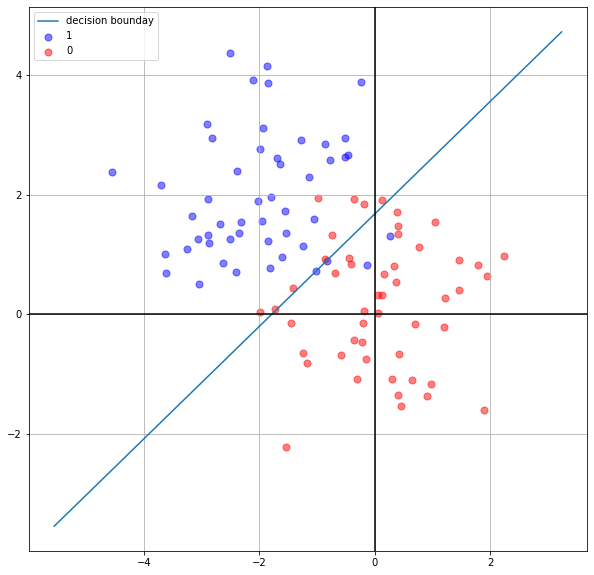

In [785]:
plot_weights(X_train,params['w'],params['b'])

### 3.2 Gradient with Backpropagation
Although the Perceptron with the step activation produces good results producing a linear classifier, it lacks another fundamental technique for being a robust neural network model—Backpropagation. Backpropagation is a short form for "backward propagation of errors." It is a method of training artificial neural networks. This method helps to calculate the gradient of a loss function for all the weights in the network. <br>
In this section, we will use a sigmoid function as an activation function instead of a step activation. Since backpropagation will not be effective with the step function its gradient (derivative) is zero, and that will not be useful for computing the loss function.<br>
<b>Loss Function</b><br>
A loss function is the function we want to minimize or maximize is called the objective function or criterion. When we are minimizing it, we may also call it the cost function, loss function, or error function [[1]](https://www.deeplearningbook.org/contents/numerical.html). <br>
To save you the time and brainpower, for our example our loss function is:
$$J(\theta)=\frac{1}{m} \sum^m_{i}cost(h_{\theta}(x^{(i)}, y^{(i)}) \\
\text{if y = 1} : -\log{(h_\theta(x))}\\
\text{if y = 0} : -\log{(1-h_\theta(x))}\\
J(\theta)=-\frac{1}{m} \sum^m_{i}{y^{(i)}\log{(h_\theta(x))}+(1-y^{(i)})(\log{(1-h_\theta(x))}} \\
J(\theta)=-\frac{1}{m} \sum^m_{i}{Y^T\log(h)+(1-Y)^T\log(1-h)}
$$


In [786]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))    
    return s

In [787]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data of size
    Y -- true "label" vector 

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    m = X.shape[0]
    alpha = 10**-8
    
    # FORWARD PROPAGATION (FROM X TO COST)
    h = sigmoid((X@w)+b)                                   # compute activation
    J = -1 / m * np.sum(Y * np.log(h+alpha) + (1-Y) * np.log((1-h)+alpha))  # compute cost
   
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = 1/m * X.T @ (h - Y)
    db = 1/m * np.sum(h - Y)

    cost = np.squeeze(J)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [788]:
def optimize(w, b, X, Y, epochs, lr, print_cost = True):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size
    b -- bias, a scalar
    X -- data of shape 
    Y -- true "label" vector
    epochs -- number of iterations of the optimization loop
    lr -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(epochs):
        
        
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - lr * dw
        b = b - lr * db
        
        # Record the costs
        if i % 50 == 0:
            costs.append(cost)
        
        # Print the cost every 10 training iterations
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [789]:
w,b = init_weights(X_train.shape[1])
learning_rate = 0.1
epochs = 100
params, grads, costs = optimize(w, b, X_train, y_train, 
                             lr=learning_rate, epochs=epochs)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 0.693147
Cost after iteration 50: 0.356590
w = [[-0.95345613]
 [ 0.68729683]]
b = -1.0747349915940945
dw = [[ 0.03164184]
 [-0.02645072]]
db = 0.08258382281222047


In [790]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size
    b -- bias, a scalar
    X -- data of size 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    A = sigmoid((X@w)+b) 
    Y_prediction = np.where(A>=0.5,1,0)
    
    return Y_prediction

In [791]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 10, learning_rate = 0.5, print_cost = True):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros
    w, b = init_weights(X_train.shape[1])

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [792]:
neuron_model = model(X_train, y_train, X_test, y_test, num_iterations=100, learning_rate=1)

Cost after iteration 0: 0.693147
Cost after iteration 50: 0.199604
train accuracy: 92.0 %
test accuracy: 97.5 %


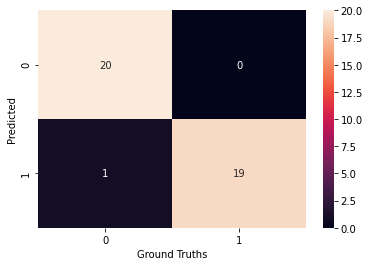

In [793]:
c_matrix = confusion_matrix(y_test, neuron_model['Y_prediction_test'])
sns.heatmap(c_matrix, annot=True)
plt.xlabel("Ground Truths")
plt.ylabel("Predicted")
plt.show()

In [794]:
print(f"F1 Score: \t{f1_score(y_test, neuron_model['Y_prediction_test'])}")
print(f"Recall: \t{recall_score(y_test, neuron_model['Y_prediction_test'])}")
print(f"Precision: \t{precision_score(y_test, neuron_model['Y_prediction_test'])}")

F1 Score: 	0.9743589743589743
Recall: 	0.95
Precision: 	1.0


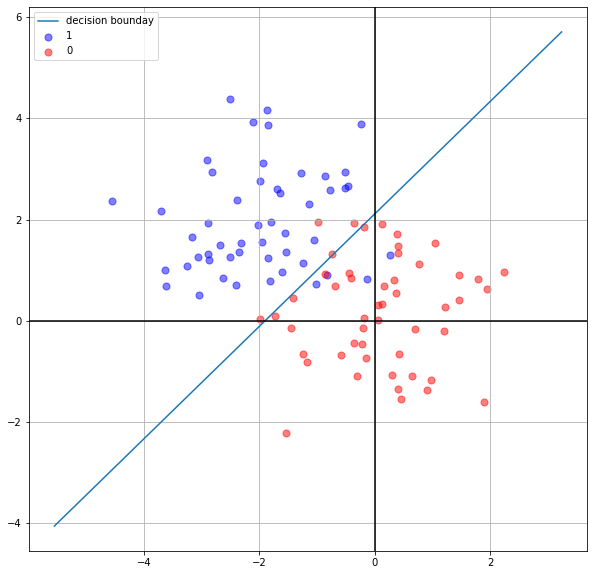

In [795]:
plot_weights(X_train,neuron_model['w'],neuron_model['b'])

# Up Next: Artificial Neural Networks
![image](https://www.researchgate.net/profile/Sandra_Vieira5/publication/312205163/figure/fig1/AS:453658144972800@1485171938968/a-The-building-block-of-deep-neural-networks-artificial-neuron-or-node-Each-input-x.png)
<br><i>Image from: Vieira, Sandra & Pinaya, Walter & Mechelli, Andrea. (2017). [Using deep learning to investigate the neuroimaging correlates of psychiatric and neurological disorders: Methods and applications.](https://www.researchgate.net/publication/312205163_Using_deep_learning_to_investigate_the_neuroimaging_correlates_of_psychiatric_and_neurological_disorders_Methods_and_applications) Neuroscience & Biobehavioral Reviews. 74. 10.1016/j.neubiorev.2017.01.002. 

### Additional Reading
* [Logistic Regression using Gradient Descent](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html)
* [Introduction to Deep Learning by Andrew Ng](https://www.youtube.com/playlist?list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0)
